# Création des fichiers de données

In [11]:
from celestialbody import CelestialBody # pour fonctionner, ce notebook doit être
                                        # dans le même dossier que le module celestialbody
from datetime import datetime, timedelta

for name in ["15P/Finlay", "1P/Halley"]:
    body = CelestialBody(name)

    start = datetime.today()
    stop  = start + timedelta(days=2.5*body.period) # pour avoir plus de données que nécessaire
    step  = 1
    next_date = start + timedelta(days=step)

    header = [u"# fichier "+body.name.lower()+".txt\n",
              u"############################################################################################\n",
              u"# Positions prévues de la comète "+body.name+" par rapport au Soleil.\n",
              u"# Les données sont prises tous les jours.\n",
              u"# La première ligne correspond au %2d/%2d/%4d, la deuxième au %2d/%2d/%4d, etc.\n"%(start.day, start.month, start.year, next_date.day, next_date.month, next_date.year),
              u"# Les distances sont exprimées en unité astronomique (au) : 1 au = %9.3e m\n"%(const.au.value),                    u"############################################################################################\n"
             ]

    body.data_position_txt(start=start, stop=stop, step=step, header=header)

In [12]:
%matplotlib inline # pour l'affichage des graphe dans le notebook

# position_comete.py 

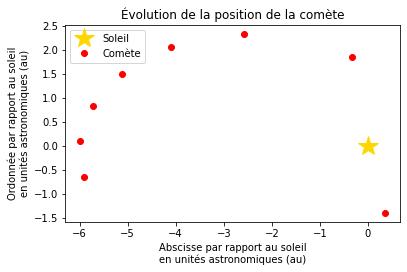

In [13]:
import numpy as np
import matplotlib.pyplot as plt

############
# PARAMETRES
############
pas = 200 # nombre de jours entre deux positions successives
n   = 8   # nombre de  positions représentées sur le graphique

###########################################################################
# LECTURE DES FICHIERS DE DONNÉES POUR RÉCUPÉRER LES POSITIONS DES PLANÈTES
###########################################################################
data = np.loadtxt("finlay.txt", skiprows=8)
x = np.array([data[i*pas,0] for i in range(n) if i*pas<len(data)])
y = np.array([data[i*pas,1] for i in range(n) if i*pas<len(data)])

##############################################################
# REPRESENTATION GRAPHIQUE DES POSITIONS DES DIFFÉRENTS OBJETS
##############################################################
fig = plt.figure()

plt.plot([0],[0], "*", color="gold", markersize=20, label="Soleil")
plt.plot(x, y, "o", color="red", label="Comète")

# Changement d'échelle pour les axes (modification des limites du graphe)
#plt.xlim(-7,2)
#plt.ylim(-3,3)

# Titre, nom des axes et légende
plt.title("Évolution de la position de la comète")
plt.xlabel("Abscisse par rapport au soleil\nen unités astronomiques (au)")
plt.ylabel("Ordonnée par rapport au soleil\nen unités astronomiques (au)")
plt.legend(loc = "upper left")
fig.axes[0].set_aspect("equal")
plt.show()

# halley.py

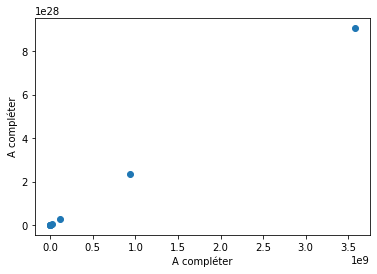

In [14]:
import numpy as np
import matplotlib.pyplot as plt

###########################################
# DONNÉES EXPÉRIMENTALES
# Ajouter les données mesurées sur la comète
###########################################
periodes      = np.array([88.0, 224.7, 365.2, 687.0, 4331, 10747, 30589, 59800]) # périodes de révolution en jours
demigrandaxes = np.array([57.9, 108.2, 149.6, 227.9, 778.6, 1433.5, 2872.5, 4495.1]) * 1e6 # demi-grands axes en unité astronomique (km)

##############################################
# CALCUL DES DONNEES À REPRÉSENTER
# Attention aux unités !
##############################################
x = periodes**2
y = demigrandaxes ** 3

# Ajustement des données par une fonction affine
#a, b = np.polyfit(x,y,1) # a est le coefficient directeur et b est l'ordonnée à l'origine

##########################
# REPRESENTATION GRAPHIQUE
##########################
fig = plt.figure()

plt.plot(x, y, "o") # Les données expérimentales
#plt.plot(x, a * x + b) # L'ajustement linéaire

plt.xlabel("A compléter")
plt.ylabel("A compléter")
plt.show()